# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

basis = 'sto-3g'

## H<sub>2</sub>

In [2]:
bond_lengths = np.linspace(0.2,2.6,15)

In [3]:
#Run FCI
FCI_PES = obtain_PES('h2', bond_lengths, basis, method='fci')

E = 0.15748213365503272 Eh
E = -0.8488991062024303 Eh
E = -1.0882281844069168 Eh
E = -1.136928959400571 Eh
E = -1.1229570527982327 Eh
E = -1.0887645364963472 Eh
E = -1.050442037218747 Eh
E = -1.0154682491653277 Eh
E = -0.987392996293216 Eh
E = -0.9670259116093083 Eh
E = -0.9534242125062942 Eh
E = -0.9449089870950516 Eh
E = -0.9398197912188275 Eh
E = -0.9368706035283361 Eh
E = -0.9351960308386078 Eh


In [4]:
#Run HF
HF_PES = obtain_PES('h2', bond_lengths, basis,  method='hf')

E = 0.16412595411335862 Eh
E = -0.8397057843499789 Eh
E = -1.074887931719117 Eh
E = -1.1175258568986912 Eh
E = -1.0951595815644795 Eh
E = -1.0495617842752072 Eh
E = -0.9960202460350677 Eh
E = -0.9415475409906814 Eh
E = -0.8899750208893146 Eh
E = -0.8432718025417755 Eh
E = -0.8022428650141384 Eh
E = -0.7669825247359998 Eh
E = -0.7371545448988288 Eh
E = -0.7121961606082431 Eh
E = -0.6914700512624794 Eh


In [18]:
#Run CCSD
CCSD_PES = obtain_PES('h2', bond_lengths, basis,  method='ccsd')

E = 0.15748412056436217 Eh
E = -0.8488985094851161 Eh
E = -1.0882310174307857 Eh
E = -1.1369333351418656 Eh
E = -1.1229593878059763 Eh
E = -1.0887606905920533 Eh
E = -1.050426089327126 Eh
E = -1.015441636439638 Eh
E = -0.9873692257052735 Eh
E = -0.9670168314563374 Eh
E = -0.9534301294889956 Eh
E = -0.9449225613845066 Eh
E = -0.9398332746700124 Eh
E = -0.9368793989542732 Eh
E = -0.9351989265367034 Eh


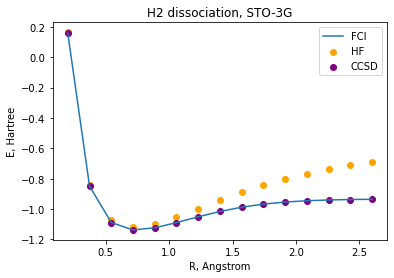

In [19]:
#Plot H2 PESs

plt.title('H2 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

<img src="figs/testimage.png">

## H<sub>2</sub>O symmetric O-H dissociation

In [4]:
bond_lengths = np.linspace(0.5,2.5,15) #If the range is 2.7 at the end, it has a problem converging

In [5]:
#Run FCI
FCI_PES = obtain_PES('h2o', bond_lengths, basis, method='fci')

E = -73.142784059984 Eh
E = -74.40580019295945 Eh
E = -74.85934058833958 Eh
E = -75.00089102191085 Eh
E = -75.014892387228 Eh
E = -74.97762126582225 Eh
E = -74.92446430998926 Eh
E = -74.87174583499106 Eh
E = -74.8268147060887 Eh
E = -74.7927721028673 Eh
E = -74.7697628728079 Eh
E = -74.75568947216688 Eh
E = -74.74762530095245 Eh
E = -74.74311657232944 Eh
E = -74.74059050397639 Eh


In [8]:
#Run HF
HF_PES = obtain_PES('h2o', bond_lengths, basis,  method='hf')

E = -73.12948161321478 Eh
E = -74.38488616385068 Eh
E = -74.82823817948889 Eh
E = -74.95548709861198 Eh
E = -74.94943802347365 Eh
E = -74.88510261009134 Eh
E = -74.79727960389822 Eh
E = -74.70225212559164 Eh
E = -74.60781024501425 Eh
E = -74.51846805420156 Eh
E = -74.4372575773091 Eh
E = -74.36975504260428 Eh
E = -74.3034270429834 Eh
E = -74.25109159621312 Eh
E = -74.27222652997716 Eh


In [6]:
#Run CCSD
CCSD_PES = obtain_PES('h2o', bond_lengths, basis,  method='ccsd')

E = -73.14276363918698 Eh
E = -74.40576508596314 Eh
E = -74.85927788559391 Eh
E = -75.0007807939694 Eh
E = -75.01469009847239 Eh
E = -74.97722719350703 Eh
E = -74.92375144243032 Eh
E = -74.87078412634622 Eh
E = -74.82649324674907 Eh
E = -74.79580249818983 Eh
E = -74.7799719470753 Eh
E = -74.74394274758397 Eh
E = -74.77941867073672 Eh
E = -74.78272264818607 Eh
E = -74.64213142943045 Eh


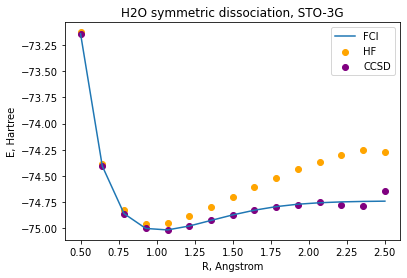

In [9]:
#Plot H2O PESs

plt.title('H2O symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

That was fun, let's start with our own stuff, gently with...
## LiH
No special distortions, this should be straight forward (although not as simple as H<sub>2</sub>)

In [10]:
#Start off with FCI
bond_lengths = np.linspace(0.5,2.5,15)
FCI_PES = obtain_PES('lih', bond_lengths, basis, method='fci')

E = -7.050225036066642 Eh
E = -7.4072389469274444 Eh
E = -7.618485908649032 Eh
E = -7.743326679368559 Eh
E = -7.815461693262607 Eh
E = -7.855365543887675 Eh
E = -7.875225404322417 Eh
E = -7.882362286810973 Eh
E = -7.881381096305702 Eh
E = -7.875322812709354 Eh
E = -7.866266687859062 Eh
E = -7.855669778443409 Eh
E = -7.844575236755091 Eh
E = -7.833743006680161 Eh
E = -7.823723883389364 Eh


In [11]:
#Run HF
HF_PES = obtain_PES('lih', bond_lengths, basis,  method='hf')

E = -7.0284717535917025 Eh
E = -7.387843201509263 Eh
E = -7.600059549831073 Eh
E = -7.725918440288832 Eh
E = -7.798689186549774 Eh
E = -7.838598337216755 Eh
E = -7.8577487033244715 Eh
E = -7.863441868065388 Eh
E = -7.860270336223522 Eh
E = -7.851246883348785 Eh
E = -7.838401832312986 Eh
E = -7.823123814855496 Eh
E = -7.806373910274669 Eh
E = -7.788829673463431 Eh
E = -7.770984662573619 Eh


In [12]:
#Run CCSD
CCSD_PES = obtain_PES('lih', bond_lengths, basis,  method='ccsd')

E = -7.050156294294409 Eh
E = -7.407223826920014 Eh
E = -7.618478894605597 Eh
E = -7.743320349849056 Eh
E = -7.815454965508252 Eh
E = -7.855358031985737 Eh
E = -7.875216475211244 Eh
E = -7.882351449527863 Eh
E = -7.881368202298232 Eh
E = -7.875307892582294 Eh
E = -7.866249502317166 Eh
E = -7.855649640068271 Eh
E = -7.844550964579755 Eh
E = -7.8337129108003065 Eh
E = -7.823685850858562 Eh


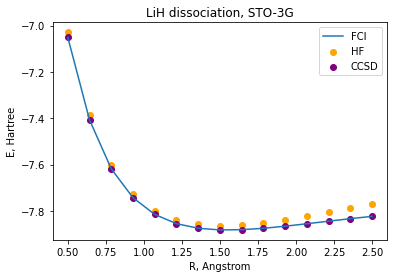

In [13]:
#Plot LiH PESs

plt.title('LiH dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

Now we more over to...
## H<sub>4</sub>
Here, because of the structure of the molecule, we can have some fun with it.
We fix the bondth length to $R = 1.738Å$, but change the angle instead from $85^{\circ}$ to $95^{\circ}$

In [2]:
angle_range = np.linspace(85,95,15)
#Run FCI
FCI_PES = obtain_PES('h4', angle_range, basis, method='fci') #Here, we have the angle range being passed to utility.py instead of the bond_lengths

E = -1.986726115111665 Eh
E = -1.9825409898098094 Eh
E = -1.9788022498350148 Eh
E = -1.9755879194306951 Eh
E = -1.9729780150314484 Eh
E = -1.9710482558385762 Eh
E = -1.9698619510159325 Eh
E = -1.9694615253790553 Eh
E = -1.9698619510159263 Eh
E = -1.9710482558385727 Eh
E = -1.9729780150314502 Eh
E = -1.9755879194306933 Eh
E = -1.978802249835021 Eh
E = -1.9825409898098094 Eh
E = -1.9867261151116788 Eh


In [3]:
#Run HF
HF_PES = obtain_PES('h4', angle_range, basis,  method='hf')

E = -1.8473793344555092 Eh
E = -1.8379561508650069 Eh
E = -1.8284425140642675 Eh
E = -1.8188368431747142 Eh
E = -1.8091373989345305 Eh
E = -1.7993422826914351 Eh
E = -1.7894494348363312 Eh
E = -1.7794566334077442 Eh
E = -1.78944943483631 Eh
E = -1.7993422826914505 Eh
E = -1.8091373989345079 Eh
E = -1.8188368431745099 Eh
E = -1.8284425140642353 Eh
E = -1.8379561508650282 Eh
E = -1.847379334455477 Eh


In [4]:
#Run CCSD
CCSD_PES = obtain_PES('h4', angle_range, basis,  method='ccsd')

E = -1.988100146542443 Eh
E = -1.984313759332981 Eh
E = -1.981079822853123 Eh
E = -1.9784956590111635 Eh
E = -1.9766572515381915 Eh
E = -1.9756486174797572 Eh
E = -1.9755294609637368 Eh
E = -1.9763244000372147 Eh
E = -1.9755294609637344 Eh
E = -1.9756486174797543 Eh
E = -1.9766572515381942 Eh
E = -1.978495659011131 Eh
E = -1.9810798228531175 Eh
E = -1.9843137593329876 Eh
E = -1.9881001465424395 Eh


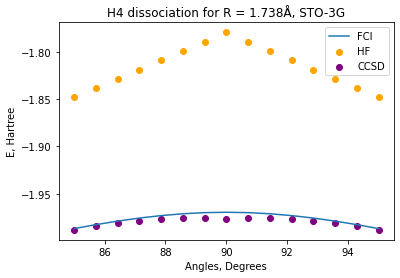

In [6]:
#Plot H4 PESs

plt.title('H4 dissociation for R = 1.738Å, STO-3G')
plt.xlabel('Angles, Degrees')
plt.ylabel('E, Hartree')

plt.plot(angle_range, FCI_PES, label='FCI')
plt.scatter(angle_range, HF_PES, label='HF', color='orange')
plt.scatter(angle_range, CCSD_PES, label='CCSD', color='purple')
plt.legend()